In [ ]:
# Install Libraries
!pip install textblob
!pip install tweepy

In [52]:
!pip install Unidecode

     -------------------------------------- 235.9/235.9 KB 3.6 MB/s eta 0:00:00


You should consider upgrading via the 'C:\Users\caperei\Anaconda3\envs\py38\python.exe -m pip install --upgrade pip' command.


In [26]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\caperei\AppData\Roaming\nltk_data...


True

In [3]:
# Import Libraries
from textblob import TextBlob
import sys
import tweepy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import nltk
import pycountry
import re
import string
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from langdetect import detect
from nltk.stem import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
# Authentication
consumerKey = 'nr4PBoGQVxtX65NzLQ2Asi1Kd'
consumerSecret = 'ikMMfoKbgPo77P1ipe8ckXOUBGWCxFWjzLXzZZIR5DlhJEbZ99'
accessToken = '420502968-VDiQXUKXksRWx1zLVvynihkWSD6fGu0KDaosnAUl'
accessTokenSecret = 'vNAGrmxDcuYbQUFEADD59Zdx6d0ixHQEK9bl6XQgqYKxz'
auth = tweepy.OAuthHandler(consumerKey, consumerSecret)
auth.set_access_token(accessToken, accessTokenSecret)
api = tweepy.API(auth)

In [3]:
parse_list=['antoniocostapm','josesoeiroporto','RuiRioPSD','jcf_liberal','AndreCVentura','catarina_mart','joao_ferreira33', 'ruitavares', 'lnes_Sousa_Real','isabelruapires','JoanaMortagua','jvasconcelos15', 'jorgecosta','jmpureza','LuisVPMonteiro','MRMortagua','moisesscf','paulino_a','PedroFgSoares','sandracunhabe', 'Leitao_Amaro','limacosta','cabreuamorim','cristovaonorte','DuarteMarques','EmiliaCerquei10','jmoreiradasilva','margaridalopes','CristasAssuncao','tbribeiro', 'coelho_lima1','hdamcarvalho','margaridalopes','sofiahmatos']
mega_tweet_list=[]
for sname in parse_list:
    try:
        #user_tweets = api.user_timeline(screen_name = sname, tweet_mode = 'extended', lang='pt', count=200, include_rts=True).items(3200)
        user_tweets = tweepy.Cursor(api.user_timeline, screen_name=sname, tweet_mode = 'extended').items(5000)
    except :
        print("Failed to run the command on that user, Skipping...")
        continue
#   user_tweets = tweepy.Cursor(api.user_timeline, screen_name=sname, tweet_mode = 'extended', lang='en').items(20)
    print(sname)
    for t in user_tweets:
        if hasattr(t, 'retweeted_status'):
            author = t.retweeted_status.user.screen_name
        else: author = t.user.screen_name
        user_id = t.user.id
        user_name = t.user.name
        user_screenName = t.user.screen_name
        user_text = t.full_text
        #user_text = re.sub(r"http\S+", "", user_text)
        user_text = re.sub(r'https?:\/\/.*[\r\n]*', '', user_text, flags=re.MULTILINE) 
        remove_rt = lambda x: re.sub('RT @\w+: ','  ',x)
        user_text.replace("\n"," ").replace("\r"," ").replace("|"," ").replace(" | "," ").replace("?"," ")
        user_text = ' '.join(user_text.split())
        user_timestamp = t.created_at
        user_retweet = t.retweet_count
        user_favorite = t.favorite_count
        user_followers = t.user.followers_count
        user_link='https://twitter.com/twitter/statuses/'+str(t.id)
        userframe = [user_id,user_link,user_name,user_screenName, author,user_text,user_timestamp,user_retweet,user_favorite,user_followers]
        mega_tweet_list.append(userframe)
    print(sname)

antoniocostapm
antoniocostapm
josesoeiroporto
josesoeiroporto
RuiRioPSD
RuiRioPSD
jcf_liberal
jcf_liberal
AndreCVentura
AndreCVentura
catarina_mart
catarina_mart
joao_ferreira33
joao_ferreira33
ruitavares
ruitavares
lnes_Sousa_Real
lnes_Sousa_Real
isabelruapires


TooManyRequests: 429 Too Many Requests
88 - Rate limit exceeded

In [7]:
parse_list=['isabelruapires','JoanaMortagua','jvasconcelos15', 'jorgecosta','jmpureza','LuisVPMonteiro','MRMortagua','moisesscf','paulino_a','PedroFgSoares','sandracunhabe', 'Leitao_Amaro','limacosta','cabreuamorim','cristovaonorte','DuarteMarques','EmiliaCerquei10','jmoreiradasilva','margaridalopes','CristasAssuncao','tbribeiro', 'coelho_lima1','hdamcarvalho','margaridalopes','sofiahmatos']

#mega_tweet_list=[]
for sname in parse_list:
    try:
        #user_tweets = api.user_timeline(screen_name = sname, tweet_mode = 'extended', lang='pt', count=200, include_rts=True).items(3200)
        user_tweets = tweepy.Cursor(api.user_timeline, screen_name=sname, tweet_mode = 'extended').items(5000)
    except :
        print("Failed to run the command on that user, Skipping...")
        continue
#   user_tweets = tweepy.Cursor(api.user_timeline, screen_name=sname, tweet_mode = 'extended', lang='en').items(20)
    print(sname)
    for t in user_tweets:
        if hasattr(t, 'retweeted_status'):
            author = t.retweeted_status.user.screen_name
        else: author = t.user.screen_name
        user_id = t.user.id
        user_name = t.user.name
        user_screenName = t.user.screen_name
        user_text = t.full_text
        #user_text = re.sub(r"http\S+", "", user_text)
        user_text = re.sub(r'https?:\/\/.*[\r\n]*', '', user_text, flags=re.MULTILINE) 
        remove_rt = lambda x: re.sub('RT @\w+: ','  ',x)
        user_text.replace("\n"," ").replace("\r"," ").replace("|"," ").replace(" | "," ").replace("?"," ")
        user_text = ' '.join(user_text.split())
        user_timestamp = t.created_at
        user_retweet = t.retweet_count
        user_favorite = t.favorite_count
        user_followers = t.user.followers_count
        user_link='https://twitter.com/twitter/statuses/'+str(t.id)
        userframe = [user_id,user_link,user_name,user_screenName, author,user_text,user_timestamp,user_retweet,user_favorite,user_followers]
        mega_tweet_list.append(userframe)
    print(sname)

isabelruapires
isabelruapires
JoanaMortagua
JoanaMortagua
jvasconcelos15
jvasconcelos15
jorgecosta
jorgecosta
jmpureza
jmpureza
LuisVPMonteiro
LuisVPMonteiro
MRMortagua
MRMortagua
moisesscf


TooManyRequests: 429 Too Many Requests
88 - Rate limit exceeded

In [8]:
parse_list=['jvasconcelos15', 'jorgecosta','jmpureza','LuisVPMonteiro','MRMortagua','moisesscf','paulino_a','PedroFgSoares','sandracunhabe', 'Leitao_Amaro','limacosta','cabreuamorim','cristovaonorte','DuarteMarques','EmiliaCerquei10','jmoreiradasilva','margaridalopes','CristasAssuncao','tbribeiro', 'coelho_lima1','hdamcarvalho','margaridalopes','sofiahmatos']
#mega_tweet_list=[]
for sname in parse_list:
    try:
        #user_tweets = api.user_timeline(screen_name = sname, tweet_mode = 'extended', lang='pt', count=200, include_rts=True).items(3200)
        user_tweets = tweepy.Cursor(api.user_timeline, screen_name=sname, tweet_mode = 'extended').items(5000)
    except :
        print("Failed to run the command on that user, Skipping...")
        continue
#   user_tweets = tweepy.Cursor(api.user_timeline, screen_name=sname, tweet_mode = 'extended', lang='en').items(20)
    print(sname)
    for t in user_tweets:
        if hasattr(t, 'retweeted_status'):
            author = t.retweeted_status.user.screen_name
        else: author = t.user.screen_name
        user_id = t.user.id
        user_name = t.user.name
        user_screenName = t.user.screen_name
        user_text = t.full_text
        #user_text = re.sub(r"http\S+", "", user_text)
        user_text = re.sub(r'https?:\/\/.*[\r\n]*', '', user_text, flags=re.MULTILINE) 
        remove_rt = lambda x: re.sub('RT @\w+: ','  ',x)
        user_text.replace("\n"," ").replace("\r"," ").replace("|"," ").replace(" | "," ").replace("?"," ")
        user_text = ' '.join(user_text.split())
        user_timestamp = t.created_at
        user_retweet = t.retweet_count
        user_favorite = t.favorite_count
        user_followers = t.user.followers_count
        user_link='https://twitter.com/twitter/statuses/'+str(t.id)
        userframe = [user_id,user_link,user_name,user_screenName, author,user_text,user_timestamp,user_retweet,user_favorite,user_followers]
        mega_tweet_list.append(userframe)

jvasconcelos15
jorgecosta
jmpureza
LuisVPMonteiro
MRMortagua
moisesscf
paulino_a
PedroFgSoares
sandracunhabe
Leitao_Amaro


TooManyRequests: 429 Too Many Requests
88 - Rate limit exceeded

In [10]:
parse_list=[ 'Leitao_Amaro','limacosta','cabreuamorim','cristovaonorte','DuarteMarques','EmiliaCerquei10','jmoreiradasilva','margaridalopes','CristasAssuncao','tbribeiro', 'coelho_lima1','hdamcarvalho','margaridalopes','sofiahmatos']
#mega_tweet_list=[]
for sname in parse_list:
    try:
        #user_tweets = api.user_timeline(screen_name = sname, tweet_mode = 'extended', lang='pt', count=200, include_rts=True).items(3200)
        user_tweets = tweepy.Cursor(api.user_timeline, screen_name=sname, tweet_mode = 'extended').items(5000)
    except :
        print("Failed to run the command on that user, Skipping...")
        continue
#   user_tweets = tweepy.Cursor(api.user_timeline, screen_name=sname, tweet_mode = 'extended', lang='en').items(20)
    print(sname)
    for t in user_tweets:
        if hasattr(t, 'retweeted_status'):
            author = t.retweeted_status.user.screen_name
        else: author = t.user.screen_name
        user_id = t.user.id
        user_name = t.user.name
        user_screenName = t.user.screen_name
        user_text = t.full_text
        #user_text = re.sub(r"http\S+", "", user_text)
        user_text = re.sub(r'https?:\/\/.*[\r\n]*', '', user_text, flags=re.MULTILINE) 
        remove_rt = lambda x: re.sub('RT @\w+: ','  ',x)
        user_text.replace("\n"," ").replace("\r"," ").replace("|"," ").replace(" | "," ").replace("?"," ")
        user_text = ' '.join(user_text.split())
        user_timestamp = t.created_at
        user_retweet = t.retweet_count
        user_favorite = t.favorite_count
        user_followers = t.user.followers_count
        user_link='https://twitter.com/twitter/statuses/'+str(t.id)
        userframe = [user_id,user_link,user_name,user_screenName, author,user_text,user_timestamp,user_retweet,user_favorite,user_followers]
        mega_tweet_list.append(userframe)

Leitao_Amaro
limacosta
cabreuamorim
cristovaonorte
DuarteMarques
EmiliaCerquei10
jmoreiradasilva
margaridalopes
CristasAssuncao
tbribeiro


TooManyRequests: 429 Too Many Requests
88 - Rate limit exceeded

In [12]:
parse_list=['tbribeiro', 'coelho_lima1','hdamcarvalho','margaridalopes','sofiahmatos','RBaptistaLeite','proque_twit', 'nunocarvalhose1','hdamcarvalho','MrciaPassos7','LeiteLramos','silvano49495907','CancelaMoura','h_oliveira','FernandoRuasPE','EmiliaCerquei10','cristovaonorte','_ClaudiaAndre','catarinarf','CEReis5','alvalmeida','Alexandre_Poco','SusanaAmador19','ssp6','saravelez','ricardo_p28','especulativa','PCegonho','deputadopaulop1','CamaraOlavo','MigCMatos','Jpcorreia1976','ebarrocomelo', 'lnes_Sousa_Real','CristinaRodDep','BebianaCunha','_jalmeida_','duartealves_','dianajmferreira','brunoramosdias','AnacoretaFilipe','tbribeiro','PNSpedronuno','JLCarneiroPS','jprebelo_sejd','hugopolidopires']
#mega_tweet_list=[]
for sname in parse_list:
    try:
        #user_tweets = api.user_timeline(screen_name = sname, tweet_mode = 'extended', lang='pt', count=200, include_rts=True).items(3200)
        user_tweets = tweepy.Cursor(api.user_timeline, screen_name=sname, tweet_mode = 'extended').items(5000)
    except :
        print("Failed to run the command on that user, Skipping...")
        continue
#   user_tweets = tweepy.Cursor(api.user_timeline, screen_name=sname, tweet_mode = 'extended', lang='en').items(20)
    print(sname)
    for t in user_tweets:
        if hasattr(t, 'retweeted_status'):
            author = t.retweeted_status.user.screen_name
        else: author = t.user.screen_name
        user_id = t.user.id
        user_name = t.user.name
        user_screenName = t.user.screen_name
        user_text = t.full_text
        #user_text = re.sub(r"http\S+", "", user_text)
        user_text = re.sub(r'https?:\/\/.*[\r\n]*', '', user_text, flags=re.MULTILINE) 
        remove_rt = lambda x: re.sub('RT @\w+: ','  ',x)
        user_text.replace("\n"," ").replace("\r"," ").replace("|"," ").replace(" | "," ").replace("?"," ")
        user_text = ' '.join(user_text.split())
        user_timestamp = t.created_at
        user_retweet = t.retweet_count
        user_favorite = t.favorite_count
        user_followers = t.user.followers_count
        user_link='https://twitter.com/twitter/statuses/'+str(t.id)
        userframe = [user_id,user_link,user_name,user_screenName, author,user_text,user_timestamp,user_retweet,user_favorite,user_followers]
        mega_tweet_list.append(userframe)

tbribeiro
coelho_lima1
hdamcarvalho
margaridalopes
sofiahmatos
RBaptistaLeite
proque_twit
nunocarvalhose1
hdamcarvalho
MrciaPassos7
LeiteLramos
silvano49495907
CancelaMoura
h_oliveira
FernandoRuasPE
EmiliaCerquei10
cristovaonorte


TooManyRequests: 429 Too Many Requests
88 - Rate limit exceeded

In [13]:
parse_list=['cristovaonorte','_ClaudiaAndre','catarinarf','CEReis5','alvalmeida','Alexandre_Poco','SusanaAmador19','ssp6','saravelez','ricardo_p28','especulativa','PCegonho','deputadopaulop1','CamaraOlavo','MigCMatos','Jpcorreia1976','ebarrocomelo', 'lnes_Sousa_Real','CristinaRodDep','BebianaCunha','_jalmeida_','duartealves_','dianajmferreira','brunoramosdias','AnacoretaFilipe','tbribeiro','PNSpedronuno','JLCarneiroPS','jprebelo_sejd','hugopolidopires']
#mega_tweet_list=[]
for sname in parse_list:
    try:
        #user_tweets = api.user_timeline(screen_name = sname, tweet_mode = 'extended', lang='pt', count=200, include_rts=True).items(3200)
        user_tweets = tweepy.Cursor(api.user_timeline, screen_name=sname, tweet_mode = 'extended').items(5000)
    except :
        print("Failed to run the command on that user, Skipping...")
        continue
#   user_tweets = tweepy.Cursor(api.user_timeline, screen_name=sname, tweet_mode = 'extended', lang='en').items(20)
    print(sname)
    for t in user_tweets:
        if hasattr(t, 'retweeted_status'):
            author = t.retweeted_status.user.screen_name
        else: author = t.user.screen_name
        user_id = t.user.id
        user_name = t.user.name
        user_screenName = t.user.screen_name
        user_text = t.full_text
        #user_text = re.sub(r"http\S+", "", user_text)
        user_text = re.sub(r'https?:\/\/.*[\r\n]*', '', user_text, flags=re.MULTILINE) 
        remove_rt = lambda x: re.sub('RT @\w+: ','  ',x)
        user_text.replace("\n"," ").replace("\r"," ").replace("|"," ").replace(" | "," ").replace("?"," ")
        user_text = ' '.join(user_text.split())
        user_timestamp = t.created_at
        user_retweet = t.retweet_count
        user_favorite = t.favorite_count
        user_followers = t.user.followers_count
        user_link='https://twitter.com/twitter/statuses/'+str(t.id)
        userframe = [user_id,user_link,user_name,user_screenName, author,user_text,user_timestamp,user_retweet,user_favorite,user_followers]
        mega_tweet_list.append(userframe)

cristovaonorte
_ClaudiaAndre
catarinarf
CEReis5
alvalmeida
Alexandre_Poco
SusanaAmador19
ssp6
saravelez
ricardo_p28
especulativa
PCegonho
deputadopaulop1
CamaraOlavo
MigCMatos
Jpcorreia1976
ebarrocomelo
lnes_Sousa_Real


TooManyRequests: 429 Too Many Requests
88 - Rate limit exceeded

In [15]:
parse_list=[ 'lnes_Sousa_Real','CristinaRodDep','BebianaCunha','_jalmeida_','duartealves_','dianajmferreira','brunoramosdias','AnacoretaFilipe','tbribeiro','PNSpedronuno','JLCarneiroPS','jprebelo_sejd','hugopolidopires']
#mega_tweet_list=[]
for sname in parse_list:
    try:
        #user_tweets = api.user_timeline(screen_name = sname, tweet_mode = 'extended', lang='pt', count=200, include_rts=True).items(3200)
        user_tweets = tweepy.Cursor(api.user_timeline, screen_name=sname, tweet_mode = 'extended').items(5000)
    except :
        print("Failed to run the command on that user, Skipping...")
        continue
#   user_tweets = tweepy.Cursor(api.user_timeline, screen_name=sname, tweet_mode = 'extended', lang='en').items(20)
    print(sname)
    for t in user_tweets:
        if hasattr(t, 'retweeted_status'):
            author = t.retweeted_status.user.screen_name
        else: author = t.user.screen_name
        user_id = t.user.id
        user_name = t.user.name
        user_screenName = t.user.screen_name
        user_text = t.full_text
        #user_text = re.sub(r"http\S+", "", user_text)
        user_text = re.sub(r'https?:\/\/.*[\r\n]*', '', user_text, flags=re.MULTILINE) 
        remove_rt = lambda x: re.sub('RT @\w+: ','  ',x)
        user_text.replace("\n"," ").replace("\r"," ").replace("|"," ").replace(" | "," ").replace("?"," ")
        user_text = ' '.join(user_text.split())
        user_timestamp = t.created_at
        user_retweet = t.retweet_count
        user_favorite = t.favorite_count
        user_followers = t.user.followers_count
        user_link='https://twitter.com/twitter/statuses/'+str(t.id)
        userframe = [user_id,user_link,user_name,user_screenName, author,user_text,user_timestamp,user_retweet,user_favorite,user_followers]
        mega_tweet_list.append(userframe)

lnes_Sousa_Real
CristinaRodDep
BebianaCunha
_jalmeida_
duartealves_
dianajmferreira
brunoramosdias
AnacoretaFilipe
tbribeiro
PNSpedronuno
JLCarneiroPS
jprebelo_sejd
hugopolidopires


In [ ]:
parse_list=['RBaptistaLeite','proque_twit', 'nunocarvalhose1','hdamcarvalho','MrciaPassos7','LeiteLramos','silvano49495907','CancelaMoura','h_oliveira','FernandoRuasPE','EmiliaCerquei10','cristovaonorte','_ClaudiaAndre','catarinarf','CEReis5','alvalmeida','Alexandre_Poco','SusanaAmador19','ssp6','saravelez','ricardo_p28','especulativa','PCegonho','deputadopaulop1','CamaraOlavo','MigCMatos','Jpcorreia1976','ebarrocomelo', 'lnes_Sousa_Real','CristinaRodDep','BebianaCunha','_jalmeida_','duartealves_','dianajmferreira','brunoramosdias','AnacoretaFilipe','tbribeiro','PNSpedronuno','JLCarneiroPS','jprebelo_sejd','hugopolidopires']

In [16]:
headers=['user_id','user_link', 'user_name','user_screenName', 'author','user_text','user_timestamp','user_retweet','user_favorite','user_followers']
df = pd.DataFrame(mega_tweet_list, columns=headers)


In [17]:
#Removing RT, Punctuation etc
remove_rt = lambda x: re.sub('RT @\w+: ','  ',x)
rt = lambda x: re.sub('[^A-Za-z0-9]+',' ',x)
df['user_text'] = df['user_text'].map(remove_rt).map(rt)
df['user_text'] = df['user_text'].str.lower()
df.sort_values('user_timestamp')[0:10]

,user_id,user_link,user_name,user_screenName,author,user_text,user_timestamp,user_retweet,user_favorite,user_followers
55481,18382771,https://twitter.com/twitter/statuses/1078728534,António Leitão Amaro,Leitao_Amaro,Leitao_Amaro,initiating himself on twitter,2008-12-26 02:19:34+00:00,0,0,5109
55480,18382771,https://twitter.com/twitter/statuses/1080135664,António Leitão Amaro,Leitao_Amaro,Leitao_Amaro,is trying to design an innovative and path bre...,2008-12-27 01:19:07+00:00,0,0,5109
55479,18382771,https://twitter.com/twitter/statuses/1081943976,António Leitão Amaro,Leitao_Amaro,Leitao_Amaro,returned to lux best lisbon club after several...,2008-12-28 06:14:51+00:00,0,0,5109
55478,18382771,https://twitter.com/twitter/statuses/1083361562,António Leitão Amaro,Leitao_Amaro,Leitao_Amaro,a non full time media web professional will ha...,2008-12-29 04:01:34+00:00,0,0,5109
55477,18382771,https://twitter.com/twitter/statuses/1090121060,António Leitão Amaro,Leitao_Amaro,Leitao_Amaro,abertura do port o do templo da corrup o em 20...,2009-01-01 16:48:20+00:00,0,0,5109
55476,18382771,https://twitter.com/twitter/statuses/1099425824,António Leitão Amaro,Leitao_Amaro,Leitao_Amaro,,2009-01-06 13:36:42+00:00,0,0,5109
55475,18382771,https://twitter.com/twitter/statuses/1104025050,António Leitão Amaro,Leitao_Amaro,Leitao_Amaro,is designing a syllabus to teach business law ...,2009-01-08 09:20:46+00:00,0,0,5109
55474,18382771,https://twitter.com/twitter/statuses/1109263113,António Leitão Amaro,Leitao_Amaro,Leitao_Amaro,algum dia se saber a resposta,2009-01-10 16:47:21+00:00,0,0,5109
55473,18382771,https://twitter.com/twitter/statuses/1128424830,António Leitão Amaro,Leitao_Amaro,Leitao_Amaro,como que uma noticia com mais d 45 000 visitan...,2009-01-18 16:53:30+00:00,0,0,5109
55472,18382771,https://twitter.com/twitter/statuses/1135806805,António Leitão Amaro,Leitao_Amaro,Leitao_Amaro,prepara a apresenta o das cervejas rosa a cerv...,2009-01-21 08:47:35+00:00,0,0,5109


In [18]:
df['year']=df.user_timestamp.dt.year
df['month']=df.user_timestamp.dt.month
df['day']=df.user_timestamp.dt.day
df['date']=df.user_timestamp.dt.date

In [19]:
df_elit=df.groupby('date').agg({'user_id':'first','user_link':'first','user_name':'first','user_screenName':'first', 'author':'first','user_text':'first','user_timestamp':'first','user_retweet':'first','user_favorite':'max','user_followers':'first'})


In [20]:
len(df_elit.user_name.unique())

35

In [21]:
df_elit.to_csv('elite_polarization_twitter.csv')

In [22]:
df_elit['user_timestamp']=df_elit['user_timestamp'].dt.tz_localize(None)

In [24]:
df_elit.to_excel("output/elite_polarization_twitter_35dep.xlsx")

In [5]:
df_dep=pd.read_csv('input/deputies_2015_now.csv')
df_elit=pd.read_excel('output/elite_polarization_twitter_35dep.xlsx')

In [9]:
df_elit.columns=['date', 'user_id', 'user_link', 'nome', 'user_screenName',
       'author', 'user_text', 'user_timestamp', 'user_retweet',
       'user_favorite', 'user_followers']

In [10]:
import unidecode
df_dep['nome']=df_dep['nome'].str.lower()
df_elit['nome']=df_elit['nome'].str.lower()

def remove_accents(a):
    
    return unidecode.unidecode(a.encode().decode('utf-8'))

df_dep['nome']=df_dep['nome'].apply(remove_accents)
df_elit['nome']=df_elit['nome'].apply(remove_accents)


In [11]:
df11=df_elit.merge(df_dep, on=['nome'], how='left', indicator=True)

In [12]:
df11.legislatura.isna().sum()

306

In [62]:
import unidecode
unidecode.unidecode('joão'.encode().decode('utf-8'))

'joao'

In [13]:
df11[df11.legislatura.isna()].nome.unique()

array(['pedro roque oliveira', 'joao ferreira', 'joao cotrim figueiredo',
       'jose soeiro', 'rui tavares'], dtype=object)

In [19]:
df11.loc[df11.nome=='jose soeiro','circulo_eleitoral']='Porto'
df11.loc[df11.nome=='jose soeiro','partido']='BE'
df11.loc[df11.nome=='jose soeiro','legislatura']=13

df11.loc[df11.nome=='joao cotrim figueiredo','circulo_eleitoral']='Lisboa'
df11.loc[df11.nome=='joao cotrim figueiredo','partido']='IL'
df11.loc[df11.nome=='joao cotrim figueiredo','legislatura']=14


In [20]:
df11=df11[~df11.nome.isin(['pedro roque oliveira', 'joao ferreira', 'rui tavares'])]

In [21]:
df11[df11.partido.isna()].nome.unique()

array([], dtype=object)

In [49]:
df11.shape

(5177, 19)

In [31]:

res = df11.partido.value_counts().to_frame('partido')
res=res.reset_index()
res.columns=['partido','partido_cnt'] 
res['partido_pct'] = res['partido_cnt'] / res['partido_cnt'].sum()
res

,partido,partido_cnt,partido_pct
0,BE,2825,0.545683
1,PS,1393,0.269075
2,PSD,792,0.152984
3,CH,92,0.017771
4,IL,36,0.006954
5,PAN,19,0.003670
6,PCP,14,0.002704
7,CDS-PP,6,0.001159


In [33]:
res['partido'].values

array(['BE', 'PS', 'PSD', 'CH', 'IL', 'PAN', 'PCP', 'CDS-PP'],
      dtype=object)

In [36]:
df_stratified=stratify_data(df11, 'partido', res['partido'].values, res['partido_pct'].values , random_state=42)


(df_stratified['partido'].value_counts() / len(df_stratified)).sort_values(ascending=False)

BE        0.545683
PS        0.269075
PSD       0.152984
CH        0.017578
IL        0.006954
PAN       0.003670
PCP       0.002704
CDS-PP    0.001352
Name: partido, dtype: float64

In [44]:
df_stratified=stratified_sample(df11, ['partido'], size=2000, seed=42, keep_index= True)

<ipython-input-43-a19ad9b8bc3c>:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp['size'] = 1


In [48]:
df_stratified.to_excel("output/elite_polarization_twitter_35depSAMPLE.xlsx")

In [47]:
resS = df_stratified.partido.value_counts().to_frame('partido')
resS=resS.reset_index()
resS.columns=['partido','partido_cnt'] 
resS['partido_pct'] = resS['partido_cnt'] / resS['partido_cnt'].sum()
resS

,partido,partido_cnt,partido_pct
0,BE,1091,0.545773
1,PS,538,0.269135
2,PSD,306,0.153077
3,CH,36,0.018009
4,IL,14,0.007004
5,PAN,7,0.003502
6,PCP,5,0.002501
7,CDS-PP,2,0.001001


In [43]:
def stratified_sample(df, strata, size=None, seed=None, keep_index= True):
    '''
    It samples data from a pandas dataframe using strata. These functions use
    proportionate stratification:
    n1 = (N1/N) * n
    where:
        - n1 is the sample size of stratum 1
        - N1 is the population size of stratum 1
        - N is the total population size
        - n is the sampling size
    Parameters
    ----------
    :df: pandas dataframe from which data will be sampled.
    :strata: list containing columns that will be used in the stratified sampling.
    :size: sampling size. If not informed, a sampling size will be calculated
        using Cochran adjusted sampling formula:
        cochran_n = (Z**2 * p * q) /e**2
        where:
            - Z is the z-value. In this case we use 1.96 representing 95%
            - p is the estimated proportion of the population which has an
                attribute. In this case we use 0.5
            - q is 1-p
            - e is the margin of error
        This formula is adjusted as follows:
        adjusted_cochran = cochran_n / 1+((cochran_n -1)/N)
        where:
            - cochran_n = result of the previous formula
            - N is the population size
    :seed: sampling seed
    :keep_index: if True, it keeps a column with the original population index indicator
    
    Returns
    -------
    A sampled pandas dataframe based in a set of strata.
    Examples
    --------
    >> df.head()
    	id  sex age city 
    0	123 M   20  XYZ
    1	456 M   25  XYZ
    2	789 M   21  YZX
    3	987 F   40  ZXY
    4	654 M   45  ZXY
    ...
    # This returns a sample stratified by sex and city containing 30% of the size of
    # the original data
    >> stratified = stratified_sample(df=df, strata=['sex', 'city'], size=0.3)
    Requirements
    ------------
    - pandas
    - numpy
    '''
    population = len(df)
    size = __smpl_size(population, size)
    tmp = df[strata]
    tmp['size'] = 1
    tmp_grpd = tmp.groupby(strata).count().reset_index()
    tmp_grpd['samp_size'] = round(size/population * tmp_grpd['size']).astype(int)

    # controlling variable to create the dataframe or append to it
    first = True 
    for i in range(len(tmp_grpd)):
        # query generator for each iteration
        qry=''
        for s in range(len(strata)):
            stratum = strata[s]
            value = tmp_grpd.iloc[i][stratum]
            n = tmp_grpd.iloc[i]['samp_size']

            if type(value) == str:
                value = "'" + str(value) + "'"
            
            if s != len(strata)-1:
                qry = qry + stratum + ' == ' + str(value) +' & '
            else:
                qry = qry + stratum + ' == ' + str(value)
        
        # final dataframe
        if first:
            stratified_df = df.query(qry).sample(n=n, random_state=seed).reset_index(drop=(not keep_index))
            first = False
        else:
            tmp_df = df.query(qry).sample(n=n, random_state=seed).reset_index(drop=(not keep_index))
            stratified_df = stratified_df.append(tmp_df, ignore_index=True)
    
    return stratified_df

def __smpl_size(population, size):
    '''
    A function to compute the sample size. If not informed, a sampling 
    size will be calculated using Cochran adjusted sampling formula:
        cochran_n = (Z**2 * p * q) /e**2
        where:
            - Z is the z-value. In this case we use 1.96 representing 95%
            - p is the estimated proportion of the population which has an
                attribute. In this case we use 0.5
            - q is 1-p
            - e is the margin of error
        This formula is adjusted as follows:
        adjusted_cochran = cochran_n / 1+((cochran_n -1)/N)
        where:
            - cochran_n = result of the previous formula
            - N is the population size
    Parameters
    ----------
        :population: population size
        :size: sample size (default = None)
    Returns
    -------
    Calculated sample size to be used in the functions:
        - stratified_sample
        - stratified_sample_report
    '''
    if size is None:
        cochran_n = round(((1.96)**2 * 0.5 * 0.5)/ 0.02**2)
        n = round(cochran_n/(1+((cochran_n -1) /population)))
    elif size >= 0 and size < 1:
        n = round(population * size)
    elif size < 0:
        raise ValueError('Parameter "size" must be an integer or a proportion between 0 and 0.99.')
    elif size >= 1:
        n = size
    return n

In [274]:
import time

ids = []
for politician in df.user_name.unique():
    for page in tweepy.Cursor(api.get_follower_ids, screen_name=politician).pages():
        ids.extend(page)
        #time.sleep(60)



In [275]:
screen_names = [user.screen_name for user in api.lookup_users(user_id=ids) if (user.followers_count<5000) & (user.followers_count>300)  ]

In [233]:
len(screen_names)

#user_tweets1 = tweepy.Cursor(api.user_timeline, screen_name='MSalvaris', tweet_mode = 'extended').items(5000)
#for t in user_tweets1:
#    print(t)

def get_usernames(ids):
    """ can only do lookup in steps of 100;
        so 'ids' should be a list of 100 ids
    """
    user_objs = api.lookup_users(user_ids=ids)
    for user in user_objs:
        print(user.screen_name)

15

In [276]:
#parse_list=['antoniocostapm','josesoeiroporto']
mass_tweet_list=[]
for sname in screen_names:
    try:
        #user_tweets = api.user_timeline(screen_name = sname, tweet_mode = 'extended', lang='pt', count=200, include_rts=True).items(3200)
        user_tweets = tweepy.Cursor(api.user_timeline, screen_name=sname, tweet_mode = 'extended').items(5000)
    except :
        print("Failed to run the command on that user, Skipping...")
        continue
#   user_tweets = tweepy.Cursor(api.user_timeline, screen_name=sname, tweet_mode = 'extended', lang='en').items(20)
    print(sname)
    for t in user_tweets:
        if hasattr(t, 'retweeted_status'):
            author = t.retweeted_status.user.screen_name
        else: author = t.user.screen_name
        user_id = t.user.id
        user_name = t.user.name
        user_screenName = t.user.screen_name
        user_text = t.full_text
        #user_text = re.sub(r"http\S+", "", user_text)
        user_text = re.sub(r'https?:\/\/.*[\r\n]*', '', user_text, flags=re.MULTILINE) 
        remove_rt = lambda x: re.sub('RT @\w+: ','  ',x)
        user_text.replace("\n"," ").replace("\r"," ").replace("|"," ").replace(" | "," ").replace("?"," ")
        user_text = ' '.join(user_text.split())
        user_timestamp = t.created_at
        user_retweet = t.retweet_count
        user_favorite = t.favorite_count
        user_followers = t.user.followers_count
        user_following=t.user.friends_count
        user_t_link=t.
        userframe = [user_id,user_name,user_screenName, author,user_text,user_timestamp,user_retweet,user_favorite,user_followers,user_following]
        mass_tweet_list.append(userframe)

Free_Webinars
LindaFarrelly4
ThinkAtlantic
F_Cafiero
RaquelBPSilva


KeyboardInterrupt: 

In [ ]:
headers=['user_id','user_name','user_screenName', 'author','user_text','user_timestamp','user_retweet','user_favorite','user_followers','user_following']
df_mass = pd.DataFrame(mass_tweet_list, columns=headers)


In [ ]:
#Removing RT, Punctuation etc
remove_rt = lambda x: re.sub('RT @\w+: ','  ',x)
rt = lambda x: re.sub('[^A-Za-z0-9]+',' ',x)
df_mass['user_text'] = df_mass['user_text'].map(remove_rt).map(rt)
df_mass['user_text'] = df_mass['user_text'].str.lower()
#df_mass.sort_values('user_timestamp')[0:10]

In [ ]:
from langdetect import detect
def detect_lang(x):
    try:
        return detect(x)
    except:
        return 'no_feat'

df_mass['lang']=df_mass['user_text'].map(detect_lang)


In [168]:

    
tweets = api.user_timeline(user_id='808051518242979841', 
                           # 200 is the maximum allowed count
                           count=200,
                           include_rts = False,
                           # Necessary to keep full_text 
                           # otherwise only the first 140 words are extracted
                           tweet_mode = 'extended'
                           )

In [169]:
len(tweets)

191

In [170]:
for info in tweets[0:3]:
     print("ID: {}".format(info.id))
     print(info.created_at)
     print(info.full_text)
     print(info.favorite_count)
     print("\n")

ID: 1493280154923249668
2022-02-14 17:45:07+00:00
A new level of costumer service🤓🛍️

Meet Dal-e the super-cute #robot assistant of @Hyundai 🚗🤖

ty @CurieuxExplorer via  @DigitalTrends cc @WhiteheartVic @MasterofIoT @CERN @vinod1975 @KaiGrunwitz @nathanbenaich @svenphilipsen #AI #Robotic #Future #DigitalTransformation #AINews https://t.co/TtVB5FVaht
12


ID: 1493252454288400391
2022-02-14 15:55:03+00:00
Distributed #ArtificialIntelligence to help make sense of #BigData 🦾 by @ingliguori

cc @HeinzVHoenen @ylecun @lawrennd @dennybritz @demishassabis #AI #Analytics #AINews #DataScience #Python #CloudComputing #DevCommunity #DataScience #DigitalTransformation #MachineLearning https://t.co/lM6kakPb70
16


ID: 1493226013240836098
2022-02-14 14:09:59+00:00
@ohhhmindy @TechInsider @glennAI @ham_gretsky @inma_martinez @cybercodetwins @enricomolinari @MasterofIoT @GoogleAI @PartnershipAI @ceobillionaire 😄😄
2




In [167]:
ids

[183063669,
 808051518242979841,
 386538440,
 1426526556134928405,
 1362063816238989313,
 796706034144411648,
 715825348684988416,
 2336551806,
 1426528724158136323,
 826109223239032832,
 3301428441,
 1169047208,
 1880109673,
 313283791,
 55362811,
 1196558746878693380,
 1704032226,
 2572941023,
 426229796,
 1161090442248613888,
 1057613509024997380,
 1007622842366611456,
 2817073844,
 933337770281578496,
 420303744,
 33277490,
 747076049565999104,
 2923874710,
 2457132342,
 3252829864,
 4900040883,
 2767606841,
 2188960103,
 1337937090,
 325564624,
 23263743,
 315492637,
 54078222]

In [50]:
tweets = api.user_timeline(screen_name='DYNAMICS_PhD', 
                           # 200 is the maximum allowed count
                           count=200,
                           include_rts = False,
                           # Necessary to keep full_text 
                           # otherwise only the first 140 words are extracted
                           tweet_mode = 'extended'
                           )

In [52]:
created_at
id
id_str
full_text
followers_count

99

In [285]:
tweets[0]._json.keys()

dict_keys(['created_at', 'id', 'id_str', 'full_text', 'truncated', 'display_text_range', 'entities', 'extended_entities', 'source', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place', 'contributors', 'is_quote_status', 'retweet_count', 'favorite_count', 'favorited', 'retweeted', 'possibly_sensitive', 'lang'])

In [286]:
tweets[0]._json

{'created_at': 'Mon Feb 14 17:45:07 +0000 2022',
 'id': 1493280154923249668,
 'id_str': '1493280154923249668',
 'full_text': 'A new level of costumer service🤓🛍️\n\nMeet Dal-e the super-cute #robot assistant of @Hyundai 🚗🤖\n\nty @CurieuxExplorer via  @DigitalTrends cc @WhiteheartVic @MasterofIoT @CERN @vinod1975 @KaiGrunwitz @nathanbenaich @svenphilipsen #AI #Robotic #Future #DigitalTransformation #AINews https://t.co/TtVB5FVaht',
 'truncated': False,
 'display_text_range': [0, 277],
 'entities': {'hashtags': [{'text': 'robot', 'indices': [62, 68]},
   {'text': 'AI', 'indices': [226, 229]},
   {'text': 'Robotic', 'indices': [230, 238]},
   {'text': 'Future', 'indices': [239, 246]},
   {'text': 'DigitalTransformation', 'indices': [247, 269]},
   {'text': 'AINews', 'indices': [270, 277]}],
  'symbols': [],
  'user_mentions': [{'screen_name': 'Hyundai',
    'name': 'Hyundai USA',
    'id': 26007726,
    'id_str': '26007726',
    'indices': [82, 90]},
   {'screen_name': 'CurieuxExplorer',
 

In [73]:
tweets[0].screen_name

AttributeError: 'Status' object has no attribute 'screen_name'

In [96]:
for info in tweets[0:3]:
     print("ID: {}".format(info.id))
     print(info.created_at)
     print(info.full_text)
     print(info.favorite_count)
     print("\n")

ID: 1487412351980736517
2022-01-29 13:08:34+00:00
Congrats and well done @anthea_jeanne 👏🏻🥳 We are very proud that another doctoral students @DYNAMICS_PhD is #PhDone https://t.co/VZXCWv9waQ
20


ID: 1483066607601688577
2022-01-17 13:20:07+00:00
@LWestheuser @HumboldtUni @MauSteffen @thomasluxberlin Welcome!
2


ID: 1481975701192560641
2022-01-14 13:05:15+00:00
@jschultecloos @GSI_Muenchen @ECPR Congrats 🥳
1




In [29]:
#Number of Tweets (Total, Positive, Negative, Neutral)
tweet_list = pd.DataFrame(tweet_list)
neutral_list = pd.DataFrame(neutral_list)
negative_list = pd.DataFrame(negative_list)
positive_list = pd.DataFrame(positive_list)
print('total number: ',len(tweet_list))
print('positive number: ',len(positive_list))
print('“negative number: “', len(negative_list))
print('“neutral number: “',len(neutral_list))

total number:  10
positive number:  2
“negative number: “ 2
“neutral number: “ 6


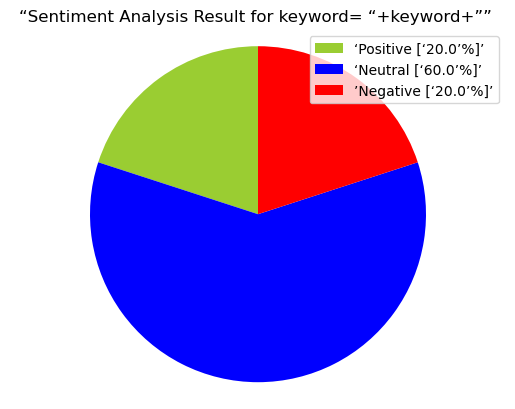

In [34]:
#Creating PieCart
labels = ['‘Positive [‘'+str(positive)+'’%]’' , '‘Neutral [‘'+str(neutral)+'’%]’','’Negative [‘'+str(negative)+'’%]’']
sizes = [positive, neutral, negative]
colors = ['yellowgreen', 'blue','red']
patches, texts = plt.pie(sizes,colors=colors, startangle=90)
plt.style.use('default')
plt.legend(labels)
plt.title('“Sentiment Analysis Result for keyword= “+keyword+”” ')
plt.axis('equal')
plt.show()

In [35]:
tweet_list

,0
0,"RT @Guarromantico_: Algún día bb, algún día… h..."
1,Ay kusura bakmayın da iğrenç bi gündü. Analiz ...
2,@bb__2_ 막 넣어 막 먹어 냠냠냠
3,"@AdrianaBotta3 Terrible enfermedad, yo cuido a..."
4,RT @Marian01643245: sana baktığımda ruhum seni...
5,RT @FormiganaPaz: FINAL DE SEMANA E TUDO NA FO...
6,"@agustinabelenb Lo amo, gracias por retratar a..."
7,@nY0nGt0ry_BB いぎだぃぃぃぃぃ
8,"RT @TejuKaDevar: Post BB Records.\n\n""CELEBRAT..."
9,RT @ohmybeautybank: [bb] Thanks in advance ❤ h...


In [36]:
tweet_list.drop_duplicates(inplace = True)

In [46]:
#Cleaning Text (RT, Punctuation etc)
#Creating new dataframe and new features
tw_list = pd.DataFrame(tweet_list)
tw_list['text'] = tw_list[0]
#Removing RT, Punctuation etc
remove_rt = lambda x: re.sub('RT @\w+: ','  ',x)
rt = lambda x: re.sub('[^A-Za-z0-9]+',' ',x)
tw_list['text'] = tw_list.text.map(remove_rt).map(rt)
tw_list['text'] = tw_list.text.str.lower()
tw_list.head(10)

,0,text
0,"RT @Guarromantico_: Algún día bb, algún día… h...",alg n d a bb alg n d a https t co nchca1phot
1,Ay kusura bakmayın da iğrenç bi gündü. Analiz ...,ay kusura bakmay n da i ren bi g nd analiz yap...
2,@bb__2_ 막 넣어 막 먹어 냠냠냠,bb 2
3,"@AdrianaBotta3 Terrible enfermedad, yo cuido a...",adrianabotta3 terrible enfermedad yo cuido a ...
4,RT @Marian01643245: sana baktığımda ruhum seni...,sana bakt mda ruhum senin i in titriyor sensi...
5,RT @FormiganaPaz: FINAL DE SEMANA E TUDO NA FO...,final de semana e tudo na formiga sabado tem ...
6,"@agustinabelenb Lo amo, gracias por retratar a...",agustinabelenb lo amo gracias por retratar a ...
7,@nY0nGt0ry_BB いぎだぃぃぃぃぃ,ny0ngt0ry bb
8,"RT @TejuKaDevar: Post BB Records.\n\n""CELEBRAT...",post bb records celebrate love with tejran
9,RT @ohmybeautybank: [bb] Thanks in advance ❤ h...,bb thanks in advance https t co pzqjnluzup


In [49]:
#Calculating Negative, Positive, Neutral and Compound values
tw_list[['polarity', 'subjectivity']] = tw_list['text'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))
for index, row in tw_list['text'].iteritems():
    score = SentimentIntensityAnalyzer().polarity_scores(row)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    if neg > pos:
        tw_list.loc[index, 'sentiment'] = 'negative'
    elif pos > neg:
        tw_list.loc[index, 'sentiment'] = 'positive'
    else:
        tw_list.loc[index, 'sentiment'] = 'neutral'
        tw_list.loc[index, 'neg'] = neg
        tw_list.loc[index, 'neu'] = neu
        tw_list.loc[index, 'pos'] = pos
        tw_list.loc[index, 'compound'] = comp
tw_list.head(10)

,0,text,polarity,subjectivity,sentiment,neg,neu,pos,compound
0,"RT @Guarromantico_: Algún día bb, algún día… h...",alg n d a bb alg n d a https t co nchca1phot,0.0,0.0,neutral,0.0,1.0,0.0,0.0
1,Ay kusura bakmayın da iğrenç bi gündü. Analiz ...,ay kusura bakmay n da i ren bi g nd analiz yap...,0.0,0.0,neutral,0.0,1.0,0.0,0.0
2,@bb__2_ 막 넣어 막 먹어 냠냠냠,bb 2,0.0,0.0,neutral,0.0,1.0,0.0,0.0
3,"@AdrianaBotta3 Terrible enfermedad, yo cuido a...",adrianabotta3 terrible enfermedad yo cuido a ...,-1.0,1.0,negative,NaN,NaN,NaN,NaN
4,RT @Marian01643245: sana baktığımda ruhum seni...,sana bakt mda ruhum senin i in titriyor sensi...,0.0,0.0,neutral,0.0,1.0,0.0,0.0
5,RT @FormiganaPaz: FINAL DE SEMANA E TUDO NA FO...,final de semana e tudo na formiga sabado tem ...,0.0,1.0,negative,NaN,NaN,NaN,NaN
6,"@agustinabelenb Lo amo, gracias por retratar a...",agustinabelenb lo amo gracias por retratar a ...,0.0,0.0,neutral,0.0,1.0,0.0,0.0
7,@nY0nGt0ry_BB いぎだぃぃぃぃぃ,ny0ngt0ry bb,0.0,0.0,neutral,0.0,1.0,0.0,0.0
8,"RT @TejuKaDevar: Post BB Records.\n\n""CELEBRAT...",post bb records celebrate love with tejran,0.5,0.6,positive,NaN,NaN,NaN,NaN
9,RT @ohmybeautybank: [bb] Thanks in advance ❤ h...,bb thanks in advance https t co pzqjnluzup,0.2,0.2,positive,NaN,NaN,NaN,NaN
